# Методы машинного обучения в области Computer Vision

## Задание 1. Превращаем видео в обучающий дата-сет

Основные шаги алгоритма для определения того, находится ли человек в
опасной зоне или нет, и если да, то надел ли он СИЗ
1. Формирование собственного обучающего дата-сета.

В случаях, когда требуется создавать свое обучающее множество,
возможен следующий порядок действий:
* Собрать видеофрагменты с требуемыми объектами (работники в
средствах индивидуальной защиты и без них).
* Нарезать видеофрагменты.
* Отфильтровать видеофрагменты, чтобы получить сбалансированный
по различным объектам распознавания дата-сет.
* Распределить кадры между разметчиками для выделения
необходимых объектов, в нашем случае, следующих СИЗ: каски,
перчатки, защитные очки, наушники и пр.
* Проверить результаты работы разметчиков.
* При необходимости осуществить аугментацию, сформировать
расширенный размеченный дата-сет за счет поворота или
отражения кадров, а также настройки резкости и контраста
изображений.
2. Обучение модели – вначале для детектирования лиц и силуэтов людей,
когда определяем, есть ли кто-то в кадре или нет.
Здесь возможен дополнительный шаг, когда делим пространство в кадре
на зоны детектирования и определяем, есть ли в опасных зонах люди,
и если да, то носят они СИЗ или нет.
3. Оценка точности модели для обучающей и тестовой выборок,
составленных на основе полученного дата-сета.
4. Отчетность и сбор статистических данных о том, как работает
программа.

## Задание 2. Обучаем модель распознавания рукописных цифр

In [1]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
# импортируем данные и создаем обучающую и тестовую выборки
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


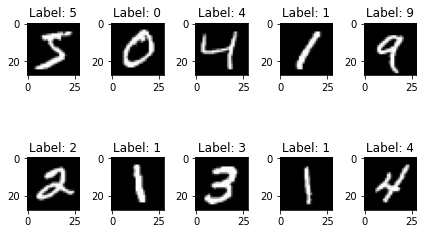

In [3]:
# добавь отображение графика
import matplotlib.pyplot as plt
%matplotlib inline

images = x_train[:10]
labels = y_train[:10]
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col) #, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [4]:
num_classes = 10 # цифры 0-9
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # размер изображения 28x28
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# переводим изображения в диапазон [0,1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# преобразование векторных классов в бинарные матрицы 
y_train = np_utils.to_categorical(y_train, num_classes) # альтернативно keras.utils для других версий Keras
y_test = np_utils.to_categorical(y_test, num_classes)
print('Размер обучающей выборки:', x_train.shape[0])
print('Размер тестовой выборки:', x_test.shape[0])

Размер обучающей выборки: 60000
Размер тестовой выборки: 10000


In [5]:
model = Sequential(
    [
    # для других версий Keras может быть в виде 32, (3,3)
    Conv2D(32, 3, 3, activation='relu', input_shape=(28, 28, 1)),
    # добавь Flatten и два слоя Dense - в первом активационная функция должна быть relu, во втором - softmax
    Flatten(),
    Dense(256, activation="relu"),
    Dense(num_classes, activation="softmax")
    ] 
)

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
# возможно keras.losses.categorical_crossentropy для других версий Keras
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 9, 32)          320       
_________________________________________________________________
flatten (Flatten)            (None, 2592)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               663808    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 666,698
Trainable params: 666,698
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# добавь fit
# Александр рекомендовал использовать batch_size = 200 и число эпох 25
# раздели train set на непосредственно обучающую и валидационную (20% от размера test set)

batch_size = 200
epochs = 25

model.fit(
    x_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.2, 
    verbose=2
)

Epoch 1/25
240/240 - 19s - loss: 2.2952 - accuracy: 0.0884 - val_loss: 2.2899 - val_accuracy: 0.1072
Epoch 2/25
240/240 - 5s - loss: 2.2832 - accuracy: 0.1279 - val_loss: 2.2772 - val_accuracy: 0.1519
Epoch 3/25
240/240 - 5s - loss: 2.2705 - accuracy: 0.1787 - val_loss: 2.2639 - val_accuracy: 0.2065
Epoch 4/25
240/240 - 5s - loss: 2.2572 - accuracy: 0.2309 - val_loss: 2.2498 - val_accuracy: 0.2576
Epoch 5/25
240/240 - 5s - loss: 2.2430 - accuracy: 0.2809 - val_loss: 2.2349 - val_accuracy: 0.3053
Epoch 6/25
240/240 - 5s - loss: 2.2278 - accuracy: 0.3269 - val_loss: 2.2188 - val_accuracy: 0.3554
Epoch 7/25
240/240 - 5s - loss: 2.2115 - accuracy: 0.3712 - val_loss: 2.2015 - val_accuracy: 0.4008
Epoch 8/25
240/240 - 5s - loss: 2.1939 - accuracy: 0.4113 - val_loss: 2.1827 - val_accuracy: 0.4443
Epoch 9/25
240/240 - 5s - loss: 2.1748 - accuracy: 0.4518 - val_loss: 2.1624 - val_accuracy: 0.4847
Epoch 10/25
240/240 - 5s - loss: 2.1541 - accuracy: 0.4884 - val_loss: 2.1402 - val_accuracy: 0.521

In [7]:
# добавь evaluate и напечатай точность работы на тестовых данных с точностью до 2 знаков после запятой

scores = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: %.2f%%" % (scores[0]))
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Test loss: 1.52%
Точность работы на тестовых данных: 74.79%
